# Requirements

1. (2 points) Provide a clear, written introduction to your topic (at least 250 words).
2. (3 points) Demonstrate that you have identified a cultural pattern, clearly defining what you mean by "Culture," and why the signs you are studying belong to a conventionalized pattern.
3. (1 point) Identify the sign relations of the sign(s) you are studying in Peircean language, along with information about the object, sign-vehicle, and interpretant.
4. (3 points) Produce at least three plots of your digital cultural data relevant to your cultural pattern identification, interpretation, and/or prediction.
5. Interpretation and prediction
    - (5 points) Write at least 1000 words explaining your interpretation/prediction and how/why your approach is an effective way to interpret/predict the cultural pattern that you identified. Include information on how the sign conventions you're studying are maintained and which cultural group(s) they are relevant to.
    - (1 point) In your explanation, identify at least one alternative interpretation for your cultural pattern, and explain using your data why your interpretation is superior. If you are predicting a cultural phenomenon, explain how the cultural phenomenon might be different from what you predict. What scenarios may cause your approach to fail?
    - (2 points) In your explanation, cite and summarize relevant Social Science theory from the course readings (at least 2 citations), as well as peer-reviewed sources that you have identified outside of the course (at least 3 citations) to support your interpretation/prediction.
    - (4 points) Successfully employ computational methods in order to make your interpretation and/or prediction.
6. (2 points) Include a conclusion that summarizes your findings and explains their Social Science significance in the study of culture (at least 250 words)
7. (1 point) Provide comments throughout your Jupyter Notebook to make your Python code clear to your audience.
8. (1 point) Include a consistently formatted bibliography at the end of the notebook.

# Introduction

William Shakespeare needs no introduction to the scholars of English literature and poetry. As a sonnet writer, he wrote 154 sonnets that were first published all together in a *quarto* in 1609, along with six additional sonnets in the plays *Romeo and Juliet*, *Henry V*, and *Love's Labour's Lost*. These sonnets explore themes such as time, death, love, wanting, beauty, lust, and homoeoticism, being drastically different from traditional sonnets that express worshipful love for an almost goddess-like yet unobtainable female love object (Shakespeare & Duncan-Jones, 2016; Wells,  1994). Because of its uncontainable enthusiasm and masterful writing, Shakespeare's sonnets are considered the classics of the classics of all English poems.

The sonnet itself was created by Giacomo da Lentini, head of the Sciliian School under Holy Roman Emperor Frederick II in the 13th century (Wilkins, 1959). Later, in the 16th century, sonnet was introduced into English poetry writing by Thomas Wyatt and then polished by William Shakespeare. Not only does the content of Shakespeare's sonent differs from traditional sonnets by adding a non-goddess-like young man and the Dark Lady, its form is also an exception. Take the beautiful sonnet 18 as an example:

    Shall I compare thee to a summer's day? (A)
    Thou art more lovely and more temperate: (B)
    Rough winds do shake the darling buds of May, (A)
    And summer's lease hath all too short a date: (B)
    Sometime too hot the eye of heaven shines, (C)
    And often is his gold complexion dimmed, (D)
    Any every fair from fair sometime declines, (C)
    By chance, or nature's changing course untrimmed: (D)
    But thy eternal summer shall not fade, (E)
    Nor lose possession of that fair thou ow'st, (F)
    Nor shall death brag thou wander'st in his shade, (E)
    When in eternal lines to time thou grow'st, (F)
      So long as men can breathe, or eyes can see, (G)
      So long lives this, and this gives life to thee. (G)

While traditional sonnet introduces the sharp thematic "turn" (the volta) in the third quatrain, Shakespeare doesn't introduce the volta until the final couplet, and usually summarizes the theme or gives a fresh new look at the theme. Arguably, this unique form not only allows more space for theme building, but also highly dramaticizes the turn by a sudden ending with endless aftertaste.

With a rigid structure and consistent topics, Shakespeare's sonents become a favourable object for natural language processing and the study of digitalization of cultural patterns. Therefore, this analysis applys computation method to explore the sonnets. In the following sections, I will first identify the patterns and sign relations of the sonnets, and then perform computation analysis including sentiment analysis, phoneticization, topic modeling, and poem generation. In the final section, I will interpret all findings and conclude the successes and shortcomings of this approach.



# Patterns and Sign Relations of Shakespeare's Sonnets

There are multiple patterns and sign relations that exist in Sakespeare's sonnets. I will identify them in the following three aspects: topics, sentiment, and rhyme and alliteration.

Take my favourite sonnet 15 as an example:

    When I consider every thing that grows, (A)
    Holds in perfection but a little moment, (B)
    That this huge stage presenteth nought but shows (A)
    Whereon the stars in secret influence comment; (B)
    When I perceive that men as plants increase, (C)
    Cheered and checked even by the self-same sky, (D)
    Vaunt in their youthful sap, at height decrease, (C)
    And wear their brave state out of memory; (D)
    Then the conceit of this inconstant stay (E)
    Sets you most rich in youth before my sight, (F)
    Where wasteful Time debateth with decay (E)
    To change your day of youth to sullied night, (F)
      And all in war with Time for love of you, (G)
      As he takes from you, I engraft you new. (G)

In terms of topics, the object is the abstract existence of sonnet itself. It is signified through the written words for the readers, as the interpretant, to understand and identify the topics. This group of sign relations is a Delome symbolic legisign (Peirce, 1955).

In terms of sentiments, the object is again the sonnet itself with written words as the sign vehicle. Readers, as the interpretant, provide a translation of the sign-vehicle to sentiments. Due to the validation of whether certain words are positive or negative, this group of sign relations is primarily a dicent indexcial legisign.

Finally, in terms of rhyme and alliteration, the object is the sonnet itself with prouncing sound as the sign vehicle. Readers, as the interpretant, associate certain prouncing sound with the rhymes and alliterations. The sound can be identical to any other sound in the world, but it doesn't act like a real sign until it becomes the prounciation of certain words in the sonnet. Therefore, this group of sign relations is defined as a rheme iconic qualisign. 

It would be fairly easy for human readers to comprehend each sonnet and identify the topics, sentiments, and rhyme and alliterations. For example, the topics of both sonent 15 and sonnet 18 are about time, love, and the wish for immortality, with the same ryhme patterns ABAB CDCD EFEF GG. However, it would be hard for human readers to assemble the understanding of each sonnet and identify a common "cultural" pattern for all 154 sonnets written by William Shakespeare (the 6 additional sonnets won't be included). That's why the computation approach come into play.

# Sentiment Analysis

## Load and pre-process data

In [ ]:
!pip install vaderSentiment
!pip install pyLDAvis

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import spacy
import re
import sys
import json
from collections import defaultdict, Counter
import nltk
import gensim
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pyLDAvis.gensim
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
def add_spacy_data(dataset, feature_column):
    
    verbs = []
    nouns = []
    adverbs = []
    corpus = []
    
    nlp = spacy.load('en_core_web_sm')
    
    for i in range (0, len(dataset)):
        print("Extracting from record {} of {}".format(i+1, len(dataset)), end = "\r")
        tweet = dataset.iloc[i][feature_column]
        doc = nlp(tweet)
        spacy_dataframe = pd.DataFrame()
        
        for token in doc:
            if token.lemma_ == "-PRON-":
                lemma = token.text
            else:
                lemma = token.lemma_
            row = {
                "Word": token.text,
                "Lemma": lemma,
                "PoS": token.pos_,
                "Stop Word": token.is_stop
            }
            spacy_dataframe = spacy_dataframe.append(row, ignore_index=True)
            
        verbs.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "VERB"].values))
        nouns.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "NOUN"].values))
        adverbs.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "ADV"].values))
        corpus_clean = " ".join(spacy_dataframe["Lemma"][spacy_dataframe["Stop Word"] == False].values)
        corpus_clean = re.sub(r'[^A-Za-z0-9]+', ' ', corpus_clean)   
        corpus.append(corpus_clean)
        
    dataset['Verbs'] = verbs
    dataset['Nouns'] = nouns
    dataset['Adverbs'] = adverbs
    dataset['Corpus'] = corpus
    
    return dataset

In [3]:
# Load dataset
poems = pd.read_csv('poem_lines.csv', engine='python')
sonnets_line = poems[poems['title']=='Sonnets'].reset_index()[['title', 'sonnet_num', 'line', 'line_number_global', 'line_number']]

# Add line number
sonnets_line['line_number'] = sonnets_line.groupby('sonnet_num').cumcount() + 1

In [4]:
# Sentiment analysis by VADER
analyser = SentimentIntensityAnalyzer()

sonnets_line = pd.concat([sonnets_line, sonnets_line['line'].apply(analyser.polarity_scores).apply(pd.Series)], axis=1)

# Add Spacy data
sonnets_line = add_spacy_data(sonnets_line, 'line')

# Store and load dataset
sonnets_line.to_csv('sonnets_line.csv')

In [5]:
# Group by each sonnet
sonnets = sonnets_line.groupby('sonnet_num')['line'].apply('\n'.join)

# Sentiment analysis
sonnets = pd.concat([sonnets, sonnets.apply(analyser.polarity_scores).apply(pd.Series)], axis=1)

# Add spacy data
sonnets = add_spacy_data(sonnets, 'line')

# Store and load dataset
sonnets.to_csv('sonnets.csv')

In [6]:
sonnets_line = pd.read_csv('sonnets_line.csv')
sonnets_line.head(14)

,Unnamed: 0,title,sonnet_num,line,line_number_global,line_number,neg,neu,pos,compound,Verbs,Nouns,Adverbs,Corpus
0,0,Sonnets,1.0,"From fairest creatures we desire increase,",1.0,1,0.000,0.444,0.556,0.6124,desire,creature increase,NaN,fair creature desire increase
1,1,Sonnets,1.0,"That thereby beauty's rose might never die,",2.0,2,0.000,0.656,0.344,0.4847,rise may die,beauty,thereby never,beauty rise die
2,2,Sonnets,1.0,"But as the riper should by time decease,",3.0,3,0.000,1.000,0.000,0.0000,should,riper time,NaN,riper time decease
3,3,Sonnets,1.0,His tender heir might bear his memory:,4.0,4,0.000,1.000,0.000,0.0000,may bear,tender heir memory,NaN,tender heir bear memory
4,4,Sonnets,1.0,"But thou, contracted to thine own bright eyes,",5.0,5,0.000,0.645,0.355,0.5927,contract thine,eye,NaN,thou contract thine bright eye
5,5,Sonnets,1.0,Feed'st thy light's flame with self-substantia...,6.0,6,0.000,1.000,0.000,0.0000,NaN,light flame self fuel,NaN,Feed st thy light flame self substantial fuel
6,6,Sonnets,1.0,"Making a famine where abundance lies,",7.0,7,0.412,0.588,0.000,-0.4215,make lie,famine abundance,where,make famine abundance lie
7,7,Sonnets,1.0,"Thyself thy foe, to thy sweet self too cruel.",8.0,8,0.427,0.382,0.191,-0.5719,thy thy,foe self,too,thyself thy foe thy sweet self cruel
8,8,Sonnets,1.0,"Thou that art now the world's fresh ornament,",9.0,9,0.000,0.753,0.247,0.3182,NaN,art world ornament,now,Thou art world fresh ornament
9,9,Sonnets,1.0,"And only herald to the gaudy spring,",10.0,10,0.000,1.000,0.000,0.0000,NaN,spring,only,herald gaudy spring


In [8]:
sonnets = pd.read_csv('sonnets.csv')
# Exclude the only sonnet with 15 lines 
sonents = sonnets[sonnets['sonnet_num']!=99]

sonnets_dict = dict(zip(sonnets.sonnet_num.astype(int), sonnets.line))
sonnets.head()

,sonnet_num,line,neg,neu,pos,compound,Verbs,Nouns,Adverbs,Corpus
0,1.0,"From fairest creatures we desire increase,\nTh...",0.173,0.702,0.125,-0.8510,desire rise may die should may bear contract t...,creature increase beauty riper time tender hei...,thereby never where too now only else,fair creature desire increase beauty rise die ...
1,2.0,"When forty winters shall besiege thy brow,\nAn...",0.044,0.747,0.209,0.9658,shall besiege dig Will hold lie say own sink e...,winter brow trench beauty field youth livery w...,when so now then where where deep all how much...,winter shall besiege thy brow dig deep trench ...
2,3.0,Look in thy glass and tell the face thou viewe...,0.013,0.882,0.105,0.8859,look tell should form dost unbless disdain wil...,glass face time face repair world mother unear...,now now where so so back so,look thy glass tell face thou viewest time fac...
3,4.0,"Unthrifty loveliness, why dost thou spend\nUpo...",0.121,0.659,0.220,0.9536,dost spend give lend lend dost give give dost ...,loveliness beauty legacy bequest doth niggard ...,why then why why so alone then how when,unthrifty loveliness dost thou spend thyself t...
4,5.0,Those hours that with gentle work did frame\nT...,0.049,0.794,0.157,0.8912,frame Will play excel rest lead confound check...,hour work gaze eye doth dwell tyrant doth time...,where very fairly never there quite where then...,hour gentle work frame lovely gaze eye doth dw...


## By sonnet

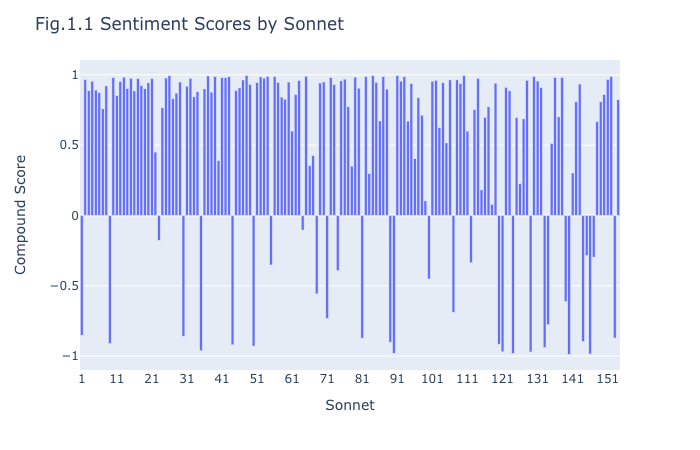

In [9]:
fig = px.bar(sonnets, x='sonnet_num', y='compound')
fig.update_layout(title = 'Fig.1.1 Sentiment Scores by Sonnet',
                  xaxis = dict(title = 'Sonnet', tickmode = 'linear', 
                               tick0 = 1, dtick = 10),
                  yaxis = dict(title = 'Compound Score')
                  )

fig.show('png')

In [10]:
print('Most postive sonnet: ')
print(sonnets[sonnets['compound']==sonnets['compound'].max()]['line'].index, 
      sonnets[sonnets['compound']==sonnets['compound'].max()]['line'].values)
print('Most negative sonnet: ')
print(sonnets[sonnets['compound']==sonnets['compound'].min()]['line'].index,
      sonnets[sonnets['compound']==sonnets['compound'].min()]['line'].values)

Most postive sonnet: 
Int64Index([47], dtype='int64') ["How careful was I, when I took my way,\nEach trifle under truest bars to thrust,\nThat to my use it might unused stay\nFrom hands of falsehood, in sure wards of trust!\nBut thou, to whom my jewels trifles are,\nMost worthy comfort, now my greatest grief,\nThou best of dearest, and mine only care,\nArt left the prey of every vulgar thief.\nThee have I not lock'd up in any chest,\nSave where thou art not, though I feel thou art,\nWithin the gentle closure of my breast,\nFrom whence at pleasure thou mayst come and part,\nAnd even thence thou wilt be stol'n, I fear,\nFor truth proves thievish for a prize so dear."]
Most negative sonnet: 
Int64Index([139], dtype='int64') ['Be wise as thou art cruel, do not press\nMy tongue-tied patience with too much disdain,\nLest sorrow lend me words, and words express\nThe manner of my pity-wanting pain.\nIf I might teach thee wit, better it were,\nThough not to love, yet, love, to tell me so,\nAs t

## By line

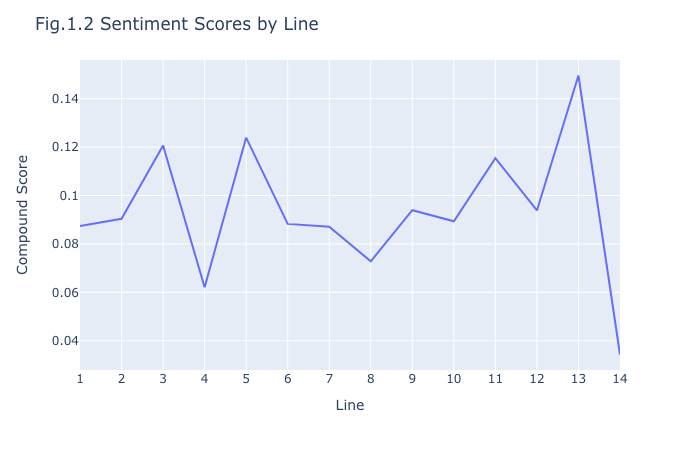

In [11]:
sentiment_by_line = sonnets_line.groupby('line_number')['compound'].mean()
sentiment_by_line = sentiment_by_line[sentiment_by_line.index != 15]

fig = px.line(sentiment_by_line,
             x=sentiment_by_line.index,
             y=sentiment_by_line.values)

fig.update_layout(title = 'Fig.1.2 Sentiment Scores by Line',
                  xaxis = dict(title = 'Line', tickmode = 'linear', 
                               tick0 = 1, dtick = 1),
                  yaxis = dict(title = 'Compound Score')
                  )

fig.show('png')

# Phoneticization

In [12]:
# Load CMU Prouncing Dictionary
with open('cmudict_abbr_js.json', 'r') as f:
  cmudict = json.load(f)

In [13]:
class Sonnet:
    
    def __init__(self, num):
        self.num = num
        self.text = sonnets_dict[num]
        self.fix_punct()
        self.get_lines()
        self.rhyme_dict = defaultdict(list)
        self.start_dict = defaultdict(list)
        self.show_rhymes_and_allit()
        self.label_rhymes_and_allit()
    
    def fix_punct(self):
        sonnet = self.text
        sonnet_no_punct = re.sub(r" '|'$", '', sonnet)
        sonnet_no_punct = re.sub(r"[,\.;!:?]", '', sonnet_no_punct)
        sonnet_no_punct = re.sub(r"'st", '', sonnet_no_punct)
        sonnet_no_punct = re.sub(r"'d", 'ed', sonnet_no_punct)
        self.sonnet_no_punct = sonnet_no_punct
        
    def get_lines(self):
        self.lines_clean = [l.strip() for l in self.text.split('\n') if re.search('\w', l)]
        self.lines = [Line(l.strip()) for l in self.sonnet_no_punct.split('\n') if re.search('\w', l)]
        for line in self.lines[-2:]:
            line.final_couplet = True
            
    def show_rhymes_and_allit(self):
        for i, l in enumerate(self.lines):
            for j, w in enumerate(l.words):
                self.rhyme_dict[w.end_rhyme].append([w, (i, j)])
                self.start_dict[w.start].append([w, (i, j)])
                
    def label_rhymes_and_allit(self):
        rhymes = sorted([x for x in self.rhyme_dict.items() if len(set([str(w[0]) for w in x[1]]))>1 if x[0]], key=lambda x: len(x[1]))[::-1]
        for n, rhyme in enumerate(rhymes):
            rhyme_num = n + 1
            for w in rhyme[1]:
                w[0].rhyme_num = rhyme_num
                
        allit = sorted([x for x in self.start_dict.items() if len(set([(str(w[0]), str(w[1][0])) for w in x[1]])) > 1 if x[0]], key=lambda x: len(x[1]))[::-1]
        for n, allit in enumerate(allit):
            allit_num = n + 1
            for w in allit[1]:
                w[0].allit_num = allit_num
                
    def return_word_objects(self):
        return [[(w, w.text, w.stress_count, w.rhyme_num) for w in l.words] for l in self.lines]
    
    
class Line:
    def __init__(self, text):
        self.text = text
        self.get_words()
        self.final_couplet = False
        self.stress_pattern = [w.stresses for w in self.words]
        self.guess_stress()
        self.get_syl_num()
        
    def get_words(self):
        self.words = [Word(w.upper()) for w in self.text.split(' ')]
        self.words[-1].line_end = True
        
    def guess_stress(self):
        wild = 10 - sum([len(sp) for sp in self.stress_pattern])
        unmatched = [w for w in self.words if w.arp_word == '**']
        if len(unmatched) > 0:
            guess = wild/len(unmatched)
            for w in unmatched:
                w.stress_count = guess
                
    # Identify syllable location (cumsum of syllable counts)
    def get_syl_num(self):
        syl_num = 1
        for word in self.words:
            word.syl_number = int(syl_num)
            syl_num += word.stress_count
            
            
class Word:
    '''Phenoticize each word, identify rhyme and alliteration, count stressess and syllable number'''
    def __init__(self, text):
        self.text = text
        self.arp_word = cmudict[text] if text in cmudict else '**'
        self.stresses = [int(s) for s in re.findall('\d', self.arp_word)]
        self.stress_count = len(self.stresses)
        self.end_rhyme = self.end_rhyme()
        self.start = self.start_sound()
        self.line_start = False
        self.line_end = False
        self.rhyme_num = 0
        self.allit_num = 0
        self.syl_number = 0
        
    def __repr__(self):
        return self.text
    
    def end_rhyme(self):
        try:
            return re.search(r'\w+\d\D+$|\w+\d$', self.arp_word).group()
        except:
            return ''
        
    def start_sound(self):
        try:
            return self.arp_word.split(' ')[0]
        except:
            return ''
    pass

<>:22: DeprecationWarning:

invalid escape sequence \w

<>:23: DeprecationWarning:

invalid escape sequence \w

<>:84: DeprecationWarning:

invalid escape sequence \d

<>:22: DeprecationWarning:

invalid escape sequence \w

<>:23: DeprecationWarning:

invalid escape sequence \w

<>:84: DeprecationWarning:

invalid escape sequence \d

<>:22: DeprecationWarning:

invalid escape sequence \w

<>:23: DeprecationWarning:

invalid escape sequence \w

<>:84: DeprecationWarning:

invalid escape sequence \d

<ipython-input-13-ee6166bc7765>:22: DeprecationWarning:

invalid escape sequence \w

<ipython-input-13-ee6166bc7765>:23: DeprecationWarning:

invalid escape sequence \w

<ipython-input-13-ee6166bc7765>:84: DeprecationWarning:

invalid escape sequence \d



In [14]:
# Take the famous Sonnet 18 as an example, map the rhyme location
rhymes = sorted([x for x in Sonnet(18).rhyme_dict.items() if len(set([str(w[0]) for w in x[1]]))>1 if x[0]], 
                key=lambda x: len(x[1]))[::-1]
rhymes

[('AO1 R',
  [[MORE, (1, 2)],
   [MORE, (1, 5)],
   [OR, (7, 2)],
   [NOR, (9, 0)],
   [NOR, (10, 0)],
   [OR, (12, 6)]]),
 ('UW1',
  [[TO, (0, 4)],
   [DO, (2, 2)],
   [TOO, (3, 5)],
   [TOO, (4, 1)],
   [TO, (11, 4)],
   [TO, (13, 8)]]),
 ('OW1', [[OW, (9, 7)], [GROW, (11, 7)], [SO, (12, 0)], [SO, (13, 0)]]),
 ('AH0 N',
  [[HEAVEN, (4, 6)],
   [OFTEN, (5, 1)],
   [COMPLEXION, (5, 5)],
   [POSSESSION, (9, 2)]]),
 ('AH0', [[A, (0, 5)], [THE, (2, 4)], [A, (3, 7)], [THE, (4, 3)]]),
 ('EH1 R',
  [[COMPARE, (0, 2)], [FAIR, (6, 2)], [FAIR, (6, 4)], [FAIR, (9, 5)]]),
 ('AY1', [[I, (0, 1)], [EYE, (4, 4)], [BY, (7, 0)], [THY, (8, 1)]]),
 ('IH1 Z', [[IS, (5, 2)], [HIS, (5, 3)], [HIS, (10, 7)]]),
 ('AY1 N Z', [[SHINES, (4, 7)], [DECLINES, (6, 6)], [LINES, (11, 3)]]),
 ('ER0 Z', [[SUMMER'S, (0, 6)], [SUMMER'S, (3, 1)], [NATURE'S, (7, 3)]]),
 ('IY1', [[THEE, (0, 3)], [SEE, (12, 9)], [THEE, (13, 9)]]),
 ('IH1 V Z', [[LIVES, (13, 2)], [GIVES, (13, 6)]]),
 ('EH1 N', [[WHEN, (11, 0)], [MEN, (12, 3)]])

In [15]:
# Map all rhyme location and frequency in all Sonnets
rhyme_location = Counter()

for s, sonn in sonnets_dict.items():
  snt_obj = Sonnet(s)
  for n, l in enumerate(snt_obj.lines):
    for w in l.words:
      if w.rhyme_num != 0:
        rhyme_location[(n, w.syl_number)] += 1

rhyme_location_df = pd.Series(list(rhyme_location.values()), index=pd.MultiIndex.from_tuples(rhyme_location.keys())).unstack().fillna(0)
rhyme_location_df = rhyme_location_df.astype(int)

In [17]:
# Map all alliteration location and frequency in all Sonnets
allit_location = Counter()

for s, sonn in sonnets_dict.items():
  snt_obj = Sonnet(s)
  for n, l in enumerate(snt_obj.lines):
    for w in l.words:
      if w.allit_num != 0:
        allit_location[(n, w.syl_number)] += 1

allit_location_df = pd.Series(list(allit_location.values()), index=pd.MultiIndex.from_tuples(allit_location.keys())).unstack().fillna(0)
allit_location_df = allit_location_df.astype(int)

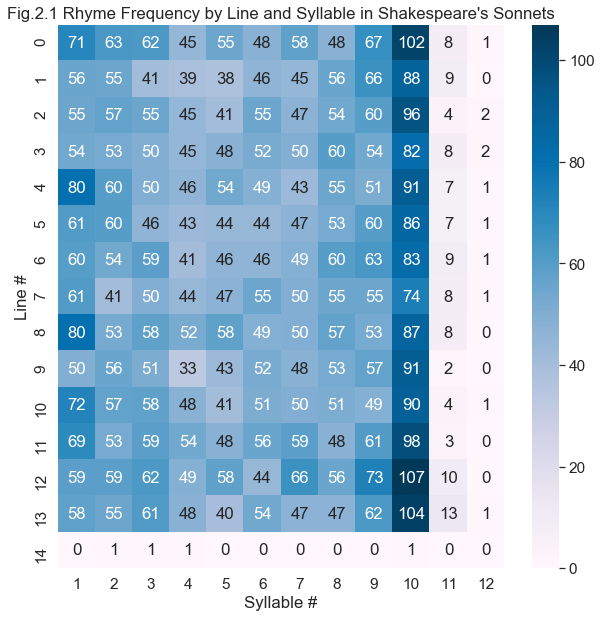

In [18]:
sns.set(style="white", font_scale=1.4)
plt.figure(figsize=(10, 10))
ax = sns.heatmap(rhyme_location_df, annot=True, fmt='g', cmap="PuBu")
ax.set_title('Fig.2.1 Rhyme Frequency by Line and Syllable in Shakespeare\'s Sonnets')
ax.set_ylabel('Line #')
ax.set_xlabel('Syllable #');

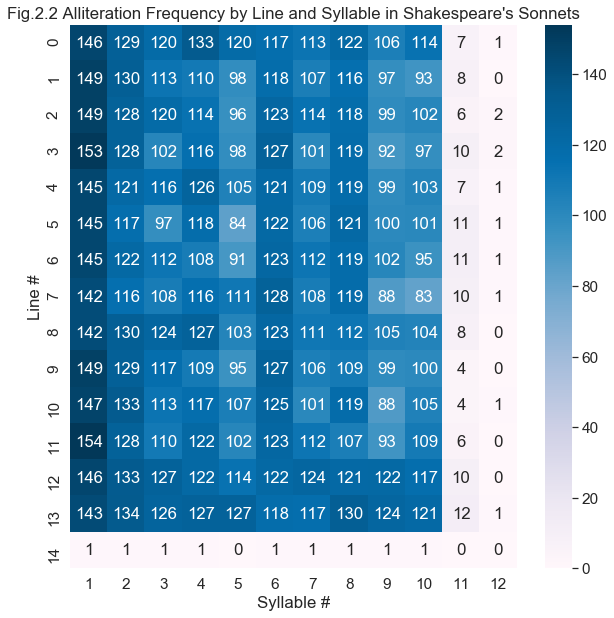

In [19]:
sns.set(style="white", font_scale=1.4)
plt.figure(figsize=(10, 10))
ax = sns.heatmap(allit_location_df, annot=True, fmt='g', cmap="PuBu")
ax.set_title('Fig.2.2 Alliteration Frequency by Line and Syllable in Shakespeare\'s Sonnets')
ax.set_ylabel('Line #')
ax.set_xlabel('Syllable #');

# Topic Modeling

In [20]:
words = gensim.corpora.Dictionary(sonnets['Nouns'].str.split())

# Turns each document into a bag of words.
corpus = [words.doc2bow(doc) for doc in sonnets['Nouns'].str.split()]

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=words,
                                            num_topics=8, 
                                            random_state=2,
                                            update_every=1,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

topics = lda_model.print_topics(num_topics = 8)

for topic in topics:
    print(topic)

(0, '0.077*"love" + 0.011*"world" + 0.011*"mine" + 0.010*"art" + 0.009*"time" + 0.009*"fear" + 0.009*"hour" + 0.009*"thought" + 0.009*"name" + 0.007*"day"')
(1, '0.022*"love" + 0.019*"praise" + 0.019*"doth" + 0.018*"word" + 0.012*"world" + 0.011*"verse" + 0.010*"time" + 0.009*"poet" + 0.009*"day" + 0.009*"argument"')
(2, '0.030*"doth" + 0.020*"time" + 0.016*"love" + 0.016*"day" + 0.014*"night" + 0.012*"beauty" + 0.008*"summer" + 0.008*"number" + 0.006*"death" + 0.006*"self"')
(3, '0.016*"beauty" + 0.013*"world" + 0.011*"eye" + 0.009*"man" + 0.008*"thy" + 0.008*"memory" + 0.008*"heart" + 0.007*"summer" + 0.007*"time" + 0.006*"reason"')
(4, '0.015*"part" + 0.012*"doth" + 0.010*"heart" + 0.010*"praise" + 0.009*"pity" + 0.009*"shadow" + 0.009*"mind" + 0.007*"none" + 0.007*"life" + 0.007*"earth"')
(5, '0.044*"love" + 0.042*"eye" + 0.031*"beauty" + 0.028*"heart" + 0.018*"doth" + 0.015*"truth" + 0.013*"mine" + 0.011*"thine" + 0.010*"face" + 0.010*"thy"')
(6, '0.028*"eye" + 0.028*"love" + 0.01

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, words)

# Poem Generation

In [21]:
raw_text = sonnets['line'].str.cat(sep = ' ').lower()

In [22]:
# Create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [23]:
# Summarize the text
n_chars = len(raw_text)
n_vocab = len(chars)
print('Total Characters: ', n_chars)
print('Total Vocab: ', n_vocab)

Total Characters:  93637
Total Vocab:  39


In [24]:
# Prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i: i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])

n_patterns = len(dataX)
print('Total Patterns: ', n_patterns)

Total Patterns:  93537


In [25]:
# Reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))
# Normalize
X = X / float(n_vocab)
# One hot encode the output variable
y = np_utils.to_categorical(dataY)

In [26]:
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [27]:
filepath = "weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
model.fit(X, y, epochs=50, batch_size=64, callbacks=callbacks_list)

In [28]:
# Load the network weights
filename = "weights-improvement-50-1.3022-bigger.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [29]:
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [33]:
# Pick a random seed
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print('Seed: ')
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
print('\n')

# Generate characters
for i in range(650):
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]

print('\n')    
print('\nDone.')

Seed: 
" ve rememb'red not to be,
die single, and thine image dies with thee. unthrifty loveliness, why dost  "


thou dort his sweet self-
fow cres hath are then i will desermst
that the thee hell day wour sweet thee for my sake,
the heart the world wo thow in me both rele.
how with the world woul eair thou art fortert,
wht which my love seale so me then befey
to grownd that thall i am not sekefr,
wht which my soue, and the that which thou destill'd thee,
when the woml my beauty should bear fantles that is the thee thee for eyes,
the hart thou that i am fortunng'd,
but the darth and thee the stbrs do sieh wo whete you have the stbrs is sene.
for them i condounds there would ston the stars and snme un thee,
and the that sueet beauty should bear fantles t


Done.


# Intrepretation

## Sentiment analysis

### By sonnet

For those who are familiar with the the storyline of the 154 sonnets, the result of the sentiment analysis won't be surprising. The sonnets begin with the poet urging a young man to marry and give birth to his children so as to pass on his legacy (sonnets 1-17), and continue with the friendship developing with the poet's loving admiration (Shakespeare & Duncan-Jones, 2016; Field, & Pequigney, 1987). In sonnet 126, another important character, the Dark Lady. is introduced. Then, the sonnets turn to describe a set of betayals by the young man, as he is seduced by the Dark Lady and maintains a liaison (sonnet 133, 134 & 144). The poet struggles to abide, and finally leads to his own act of betrayal.

The graph of sentiment analysis clearly reflects the change of sentiments through the 154 sonnets. The first part of the sonnets (1-17) is overwhelmingly positive with only two negative-scored sonnets. The overall positivity, with some slight decline compared to the first 17 sonnets, continues until somewhere around sonnet 63. From sonnet 63 to sonnet 120, while most of the sonnets remain positive, its compound score begins to decline significantly with a higher frequency of negative scores. Finally, the last part of the sonnets where the Dark Lady is introduced, we can observe the highest frequency of negativity. It's of no surprise that the famous sonnet 133, 134, 144 are among the most negative ones, as the poet describes his feelings of torment and loss after his beloved friend was engrossed by her sexual charms and fell in love with her.

### By line

Sentiment analysis by line is performed by calculating the mean of all 154 sentiment scores by each line. Sonnet 99 was excluded from the analysis, as it is the only sonnet with 15 lines.

As mentioned before, sonnets are constructed of three quatrains (four-line stanzas) followed by final couplet. A main feature of Shakespeare's sonnets is their unique location of the *volta* (turn). While traditional sonnet introduces the sharp thematic *volta* at the start of the third quatrain, Shakespeare doesn't introduce the volta until the final couplet, and usually summarizes the theme or gives a fresh new look at the theme. Therefore, we expected to see a consistent flow of sentiment scores within each quantrain and a sudden change of sentiments at the transition of quantrains and at the transition from the last quantrain to the final couplet.

The result is pretty much identical to my expectations. At each transition (from line 4 to line 5, from line 8 to line 9, from line 12 to line 13), the sentiment score rises sharply, being drastically different from the sentiment decline between the previous two lines (from line 3 to line 4, from line 7 to line 8, from line 11 to line 12). However, the largest increase of sentiment scores is at the transition from the first quantrain to the second one. It indicates that sentiment scores might not be the best way to identify the thematic *volta*.

It's totally unexpected that the two lines in the final couplet have such contrast in sentiment scores. While the first line of the final couplet (line 13) has the highest sentiment scores among all 14 lines, the second line has the lowest. For the time being, I can't come up with an theoretical explanation, which I will explore further in the future.

## Phenoticization

Since Shakespeare's sonnets are written predominantly in a meter called iambic pentameter, the rhyme scheme in each line typically consists of ten syllables divided into five pairs. An iamb is a metrical unit made up of one unstressed syllable followed by one stressed syllable. For example, the first two lines of sonnet 18:

    Shall I compare thee to a summer's day?
    Thou art more lovely and more temperate:

They can be viewed with iambic pentameters, perfectly:

    Shall I / com PARE/ thee TO / a SUM / mer's DAY? 
    Thou ART / more LOVE / ly AND / more TEM / per ATE:

Therefore, a sonnet can be viewed as a 14\*10 matrix with a row for each line and a column for each syllable, if written precisely follwing the rules. Yet, it's known that Shakespeare often tends to vary the stress pattern occasionally and uses this variation to draw attention from the readers to key phrases. Following the two lines of perfect iambic pentameter, the third line of sonnet 18 goes:

    Rough winds do shake the darling buds of May
    ROUGH WINDS / do SHAKE / the DAR / ling BUDS / of MAY

To visualize the rhyme location, I used the [CMU dictionary](http://www.speech.cs.cmu.edu/cgi-bin/cmudict) to phenoticize each word and identify the number of syllables, ending rhymes and alliterations. The result is in figure 2.

The result is consistent to my expectations. While the majority of sonnets can be viewed as a 14\*10 matrix, variations do exit, thus extending the matrix to 14\*12. The alliteration is mostly frequently placed at the first syllable of each line while the rhyme is mostly frequently place at the 10th syllable of each line. In addition, it appears that rhymes at the first line and the final couplet are used most consistently, which makes a lot sense as the openning and the ending of the poem tend to obey the rules more strictly. In the middle of the three quantrains, Shakespeare is less restricted by the ideal iambic pentamenter.

## Poem generation

I used the LSTM RNN approach to train the black-box model and generate poems (Brownlee, 2016). However, the result is not so pleasing to read.

While the model successfully identified some breaking points ('\n') between sentences, the generated poem is not even close to the original form where each line has similiar length and ten syllables. A high frequency of random words appeared in the generation that makes the whole text incomprehensible.


## Limitations and alternative approaches

The main limitation of this analysis is the considerable differences between Shakespeare's English and modern English. SpaCy, sentiment analyzer Vader, and the CMU dictionary don't have the capability of dealing with Shakespeare's English. For example, stop words like thy, thee, thine have to be manually removed (which I didn't because it only matters to topic modeling). Vader analyzer is specifically designed to evaluate content on social media rather than poetry. Finally, a lot of words don't exit in SpaCy and the CMU dictionary, as some of them are modified by Shakespeare to meet the requirements of iambia pentameter, such as "viewest" and "renewest".

Secondly, in terms of peom generation, my approach is strictly a LSTM RNN approach, which doesn't take phenoticization or the structure of sonnets into consideration. An alternative approach is to combine the information of text/words with phenoticization, thus setting a restriction for the model to generate a 14*10 matrix. Another alternative approach is to use Generative Adversarial Network that trains two models: a generator to generate poem and a discriminator to identify whether the poem is original or faked. However, these two alternative approaches are beyong my computational skills for now.

# Conclusion

The above analysis applied computational methods to study Shakespeare's 154 sonnets. Specifically, I performed sentiment analysis, topic modeling, poem generation based on the LSTM RNN approach, and a visualization of phenoticization.

The sentiment analysis and the visualization of phenoticization are successful and consistent to my expectations. The sentiment anlaysis shows a declining trend of positivity from the first 17 sonnets to the middle part, and then to the final 30 sonnets where the Dark Lady was introduced. Furthermore, it successfully identified a sudden rise of sentiments at each transition of quantrains and at the transition from the last quantrain to the final couplet. This finding indicates how Shakespeare tends to start a quantrain with a positive line and end a quantrain with a lower tone.

Phenoticization successfully validated the 14*10 form of sonnets in which each row stands for a column and each column stands for a syllable. The visualization shows that Shakespeare follows the form much more rigorously at the beginning and ending of sonnets than the middle part. This finding points a very effective writing skill that the poet might take more liberty and have more variations in the middle part of the poem so as to attract readers to key phrases.

Compared to sentiment analysis and pehnoticization, topic modeling and poem generation are less of a success. They point out the two following future research directions. First, establish a dictionary and rules for processing Shakespeare's English. Second, combine the information of words and phenoticization into the black-box model.

I believe that this analaysis doesn't apply exclusively to Shakespeare's sonents, but instead, has the ample potential to be applied to other poetry writings as well. For the poems that less strictly follow a particular form, the methods used in this analysis will be able to summarize all forms and visualize them in a matrix. Of course, the shortcomings in this analysis can be the future research direction for all computational study of poems.

# References

- Brownlee. (2016). Text Generation with LSTM Recurrent Neural Networks in Python with Keras

- Field, &amp; Pequigney, J. (1987). Such is my love: A study of shakespeare's sonnets. Shakespeare Quarterly, 38(3), 375.

- Nöth. (2002). Semiotic Machines

- Peirce. (1955). Logic as Semiotic: The Theory of Signs

- Shakespeare, W., &amp; Duncan-Jones, K. (2016). Shakespeare's sonnets. London: Bloomsbury.

- Wells. (1994). Shakespeare and sexuality. Cambridge: Cambridge University Press.

- Wilkins, E. H. (1959). The invention of the sonnet and other studies in italian literature. Roma: Edizioni di storia e letteratura.
